In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras # type: ignore
import matplotlib.pyplot as plt

# path to json file that stores MFCCs and genre labels for each processed segment
DATA_PATH = "data_10.json"

In [2]:
def load_data(data_path):
    """Loads training dataset from json file.

    :param data_path (str): Path to json file containing data
    :return X (ndarray): Inputs
    :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data successfully loaded!")

    return X, y


In [5]:
def prepare_datasets(test_size, validation_size):
    
    # load data
    X,y = load_data(DATA_PATH)
    
    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)
    
    # #3d array -> (130, 13, 1)
    # X_train = X_train[..., np.newaxis]
    # X_validation = X_validation[..., np.newaxis]
    # X_test = X_test[..., np.newaxis]
    #RNN do not need 3rd dimension
    
    return X_train, X_validation, X_test, y_train, y_validation, y_test


# create train, validation and test set
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25,0.2)



Data successfully loaded!


In [6]:
#build the RNN net
def build_model(input_shape):
    model = keras.Sequential()
    
    # 2 LSTM layers
    
    model.add(keras.layers.LSTM(64, input_shape = input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))
    
    # Dense layer
    model.add(keras.layers.Dense(64, activation = 'relu'))
    model.add(keras.layers.Dropout(0.3))
    
    #output
    model.add(keras.layers.Dense(10, activation='softmax'))
    

    return model
    

In [7]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (130, 13)
print(type(input_shape))
print(input_shape)
model = build_model(input_shape)

<class 'tuple'>
(130, 13)


C:\Users\x1305\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
#compile
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 130, 64)        │        19,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,802 (225.79 KB)

 Trainable params: 57,802 (225.79 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#train
history = model.fit(X_train,y_train, validation_data=(X_validation,y_validation), batch_size=32, epochs=30)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.1173 - loss: 2.2923 - val_accuracy: 0.2933 - val_loss: 2.1012
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.3030 - loss: 2.0314 - val_accuracy: 0.3800 - val_loss: 1.8157
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.3810 - loss: 1.8018 - val_accuracy: 0.4160 - val_loss: 1.6746
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.4243 - loss: 1.6458 - val_accuracy: 0.4460 - val_loss: 1.5825
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - accuracy: 0.4519 - loss: 1.5750 - val_accuracy: 0.4653 - val_loss: 1.5059
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.4674 - loss: 1.5232 - val_accuracy: 0.4773 - val_loss: 1.4493
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.4851 - loss: 1.4732 - val_accuracy: 0.5087 - val_loss: 1.4016
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.5107 - loss: 1.3937 - v

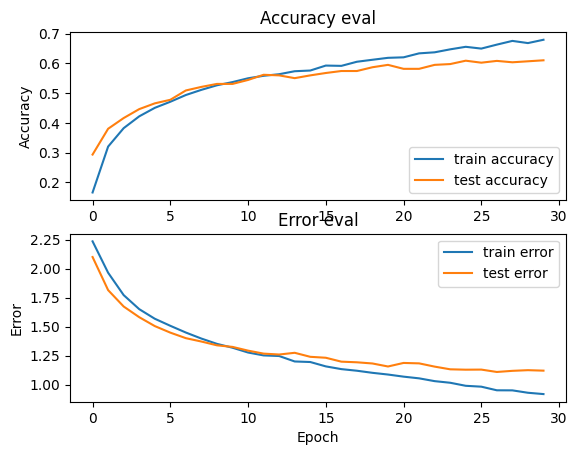

79/79 - 1s - 19ms/step - accuracy: 0.6242 - loss: 1.0780

Test accuracy: 0.6242496967315674


In [16]:

def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

    :param history: Training history of model
    :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()
    
# plot accuracy and error as a function of the epochs
plot_history(history)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

In [29]:
#eval
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose = 1)
print("accuracy on test set it: {}".format(test_accuracy))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7174 - loss: 0.8134
accuracy on test set it: 0.7114846110343933


In [36]:
# prediction on a sample
genres = ["blues", "classical", "country", "disco", "hip-pop", "jazz", "metal", "pop", "reggae", "rock"]

def predict(model, X, y):
    X = X[np.newaxis]  # augumented 3d array X to a 4d array
    # prediction is a 2d array [[0.1,0.2,...]]
    prediction = model.predict(X)  # X -> (1, 130, 13, 1)
    # extract index with max values in prediction
    prediction_index = np.argmax(prediction, axis = 1) # get [index], then map it to the genre label
    print("expected index: {}, Predicted index: {}".format(y, prediction_index))
    print(prediction_index)
    predicted_genre = genres[prediction_index[0]]
    y_genre = genres[y]
    print("expected genre: {}, Predicted genre: {}".format(y_genre, predicted_genre))
    

X = X_test[100]
y = y_test[100]
predict(model, X, y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
expected index: 9, Predicted index: [9]
[9]
expected genre: rock, Predicted genre: rock
